In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import utilities as u

df_boston_calendar = pd.read_csv('./BOSTON/calendar.csv')
df_seattle_calendar = pd.read_csv('./SEATTLE/calendar.csv')

In [6]:
#dropping na from the dataset of Boston and seattle Calendar Data
df_bost_cal = df_boston_calendar.dropna(axis=0)
df_seat_cal = df_seattle_calendar.dropna(axis=0)

In [7]:
#converting price to float and date string to datetime
df_bost_cal = u.convert_amount(df_bost_cal, ['price'])
df_seat_cal = u.convert_amount(df_seat_cal, ['price'])
df_bost_cal['date']=pd.to_datetime(df_bost_cal['date'])
df_seat_cal['date']=pd.to_datetime(df_seat_cal['date'])

<ipython-input-7-ca16129e9835>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bost_cal['date']=pd.to_datetime(df_bost_cal['date'])
<ipython-input-7-ca16129e9835>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_seat_cal['date']=pd.to_datetime(df_seat_cal['date'])


In [8]:
#calculationg mean listings price for a particular date for both Boston and Seattle Data frames
d_bost=df_bost_cal.groupby('date')['price'].mean().to_frame(name='Mean_price').reset_index()
d_seat=df_seat_cal.groupby('date')['price'].mean().to_frame(name='Mean_price').reset_index()

<Figure size 432x2160 with 0 Axes>

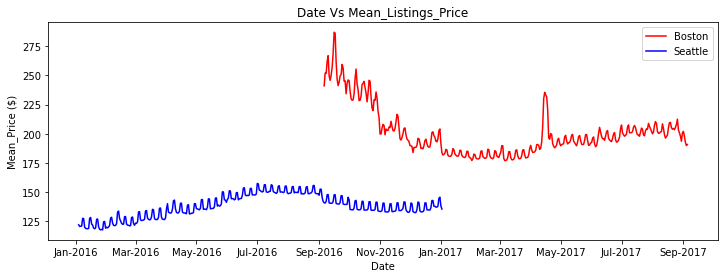

In [9]:
from matplotlib.dates import DateFormatter
#setting height and width of the plot
plt.figure().set_figheight(30)
plt.figure().set_figwidth(12)

#plotting line chart
plt.plot(d_bost['date'],d_bost['Mean_price'],color='red')
plt.plot(d_seat['date'],d_seat['Mean_price'],color='blue')

#converting date format
date_form = DateFormatter("%b-%Y")
plt.gca().xaxis.set_major_formatter(date_form)

#setting X,Y labels, title and legend
plt.gca().set(xlabel="Date",
       ylabel="Mean_Price ($)",
       title="Date Vs Mean_Listings_Price")
plt.legend(["Boston","Seattle"])
plt.show()